In [1]:
path=  'C:/Users/felipe/Documents/Brain/'
import sys
sys.path.append(path) 

In [2]:
path_=  'C:/Users/felipe/Documents/Brain/Models/'
import sys
sys.path.append(path_) 

In [3]:
from mlp_regressor import MLPRegressorCustom
from mlp_regressor import MLPWrapper

from Plotter import Plotter


c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import pandas as pd
import pickle


file_name = '/Brain_Age/dataframe_alpha.xlsx'
file_path = f"{path}{file_name}"
df = pd.read_excel(file_path)
# Filtrar las filas con Age mayor de 20
df_filtrado = df[df['Age'] > 20].reset_index(drop=True)
# Separar la variable de destino (y) y las características (X)
X = df_filtrado.drop(columns=["Unnamed: 0", "Age"])
y = df_filtrado["Age"]

In [14]:
mlp_model = MLPRegressorCustom()
mlp_model.set_data(X,y)
Plotter = Plotter()

In [11]:
with open(f'{path}Opt_Model/opt_MLP_model_400iter.pickle', 'rb') as file:
    opt_mlp= pickle.load(file)

In [12]:
errores = opt_mlp.cv_results_['mean_test_score'][:100]


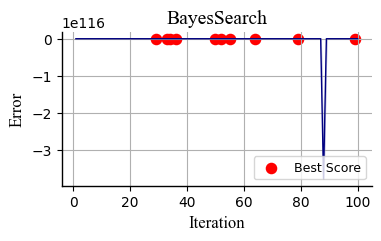

Top 1: Iteration 50, Score -13.241145787428769
Top 2: Iteration 34, Score -13.260045218111904
Top 3: Iteration 52, Score -13.282042412880466
Top 4: Iteration 79, Score -13.308556311665802
Top 5: Iteration 33, Score -13.314481749694753
Top 6: Iteration 99, Score -13.339647851406024
Top 7: Iteration 64, Score -13.359984027047469
Top 8: Iteration 55, Score -13.362700257995499
Top 9: Iteration 29, Score -13.364866967816303
Top 10: Iteration 36, Score -13.366401632528348


In [15]:
Plotter.plot_iteration(y=errores, title='BayesSearch', xlabel='Iteration', ylabel='Error', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2)

In [16]:
best_params_mlp = mlp_model.best_hyper(opt_mlp, num_max=100)

In [ ]:
results, best_model_results , best_model, residual_model= mlp_model.trainer_2(params_=best_params_mlp[0])

In [28]:
#with open(f'{path}Opt_Model_2/BestModel_MLP_all_features.pickle', 'wb') as file:
#    pickle.dump(best_model, file)
#with open(f'{path}/Opt_Model_2/results_MLP_all_features.pickle', 'wb') as file:
#    pickle.dump(results, file)
#with open(f'{path}/Opt_Model_2/residual_model_MLP_model_all_features.pickle', 'wb') as file:
#    pickle.dump(residual_model, file)

In [8]:
with open(f'{path}Opt_Model_2/BestModel_MLP_all_features.pickle', 'rb') as file:
    model =  pickle.load(file)
    
with open(f'{path}Opt_Model_2/results_MLP_all_features.pickle', 'rb') as file:
    results =  pickle.load(file)

with open(f'{path}Opt_Model_2/residual_model_MLP_model_all_features.pickle', 'rb') as file:
    residual_model =  pickle.load(file)

In [ ]:
results

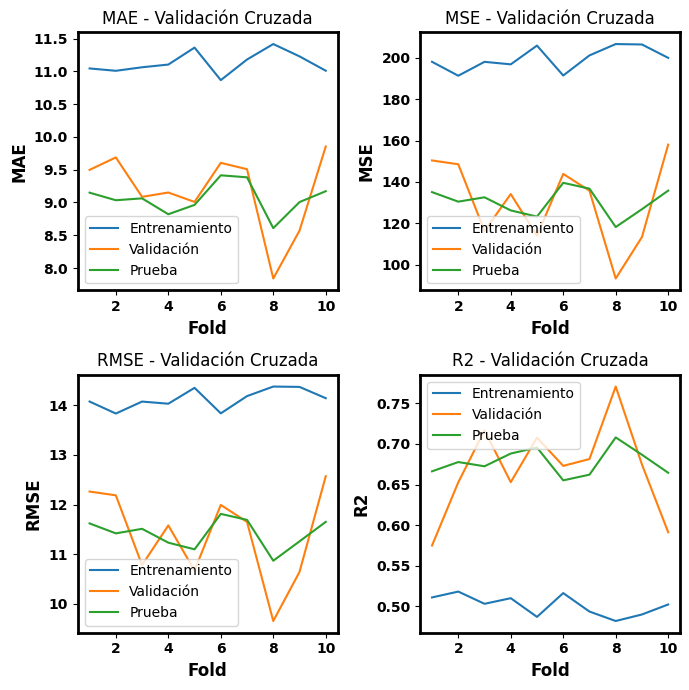

In [22]:
Plotter.plot_metricas_evaluacion(results)

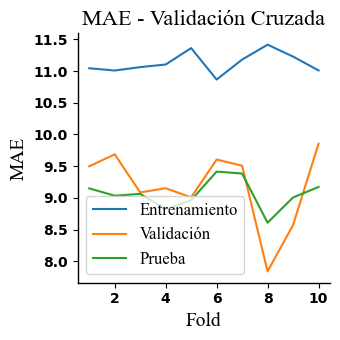

In [23]:
Plotter.plot_metrica_evaluacion(results, font='Times New Roman',mode=2,fontsize=14,x_size=3.5,y_size=3.5 )

In [24]:
y_pred=mlp_model.predicter_corrected_2(X_test= mlp_model.X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     854.7
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           3.24e-86
Time:                        13:01:02   Log-Likelihood:                -1048.9
No. Observations:                 276   AIC:                             2102.
Df Residuals:                     274   BIC:                             2109.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1554      1.672      1.289      0.1

C:\Users/felipe/Documents/Brain/Models\Plotter.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


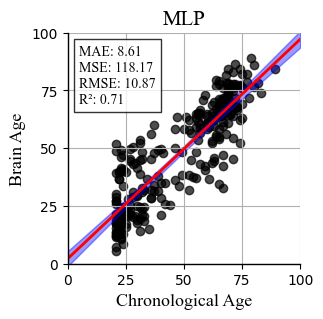

Error medio absoluto: 8.60816336872881
Error cuadrático medio: 118.16588480607314
Raíz del error cuadrático medio: 10.870413276691606
Coeficiente de determinación (R²): 0.7080213625892899


In [26]:
Plotter.plot_regresion(y=y_pred,x= mlp_model.y_test, label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title='MLP',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

In [27]:
shap_values, shap_summary_sorted = mlp_model.feature_importance_shap(X_test = mlp_model.X_test, model = mlp_model.model)

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Fallo al usar shap.Explainer, intentando con shap.KernelExplainer: The passed model is not callable and cannot be analyzed directly with the given masker! Model: MLPWrapper(activation='logistic', alpha=1e-05, batch_size=32, layer1=1027,
           layer2=300, learning_rate='constant',
           learning_rate_init=0.00015603214769031388, num_hl=2, solver='sgd')


  0%|          | 0/276 [00:00<?, ?it/s]c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
  0%|          | 1/276 [00:00<04:00,  1.14it/s]c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
  1%|          | 2/276 [00:01<04:21,  1.05it/s]c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\sklearn

Importancia de características basada en suma de valores SHAP:
Low_subj_spec_RPD_OCC_left: 1509.5671799023867
Low_subj_spec_EPP_CING_left: 1207.884207131952
Low_subj_spec_EPP_HPC_right: 1104.3772694158893
Low_subj_spec_RPD_CING_right: 947.3027371435577
TF_MFG_right: 840.5118147671176
TF_HPC_right: 758.1961982439764
Low_subj_spec_EPP_HPC_left: 757.2815574533657
Low_subj_spec_RPD_OCC_right: 706.2384378044441
High_subj_spec_RPD_CING_right: 608.2073634521381
Low_subj_spec_RPD_PARIET_right: 600.8458174895991
Low_subj_spec_RPD_CING_left: 593.2814877641746
High_subj_spec_EPP_CING_right: 591.2780098426229
IAF_OCC_left: 538.3664085990002
Low_subj_spec_EPP_PARIET_left: 529.1649562820189
Alpha2_canon_EPP_OCC_right: 527.4456469147034
IAF_HPC_right: 526.104068299841
Alpha2_canon_RPD_OCC_right: 517.433107259302
TF_SFG_right: 514.1870778048353
IAF_OCC_right: 507.10843758523845
Low_subj_spec_EPP_OCC_right: 505.29920604148754
Alpha2_canon_RPD_HPC_left: 453.2742041552099
Alpha2_canon_EPP_HPC_left: 449.1

In [29]:
shap_por_region_sorted, resultado_normalizado_sorted=mlp_model.shap_region(shap_summary_sorted=shap_summary_sorted, num_max=20)

OCC_right: 1.000000
HPC_right: 0.864359
CING_right: 0.776830
OCC_left: 0.741059
CING_left: 0.651764
MFG_right: 0.304145
HPC_left: 0.274027
PARIET_right: 0.217420
PARIET_left: 0.191482
SFG_right: 0.186062


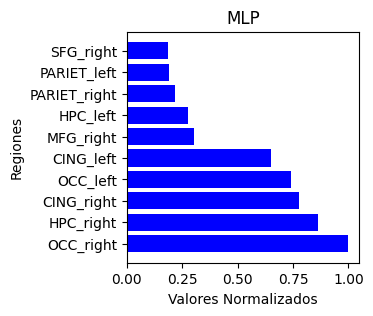

In [31]:
Plotter.plot_normalized_values(resultado_normalizado_sorted, color='blue', name_set='MLP',x_size=3,y_size=3)

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


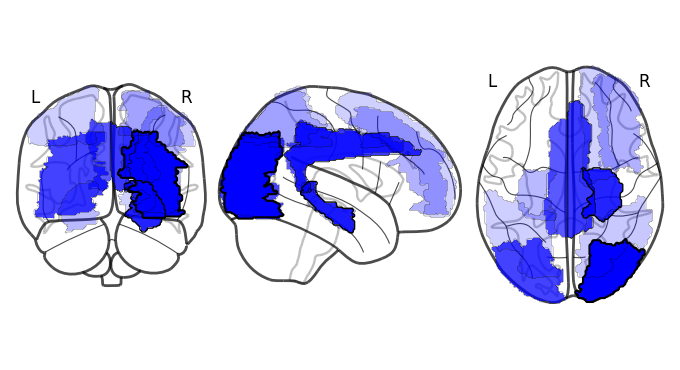

In [32]:
base_path = f'{path}cerebritos/'

Plotter.plot_brain_regions(resultado_normalizado_sorted, base_path, color='blue')